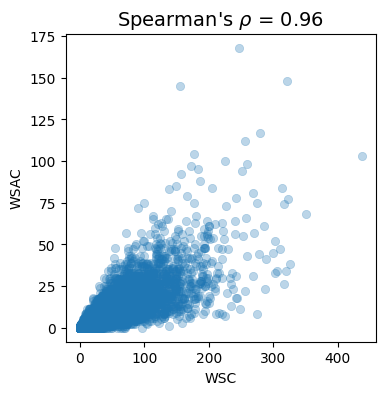

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypical.csv")
# Calculate the correlation between two columns
correlation_value = df['mit_wsi_count'].corr(df['aty_wsi_count'], method="spearman")

# Create a scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x='mit_hotspot_count', y='aty_hotspot_count', data=df, alpha=0.3, edgecolor=None)
plt.xlabel("WSC")
plt.ylabel("WSAC")
# Set the title with the correlation value
plt.title(r"Spearman's $\rho$" + f" = {correlation_value:.2f}", fontsize=14)
# plt.savefig("results_final/atypical/wsi_corr.png", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)
# Display the plot
plt.show()

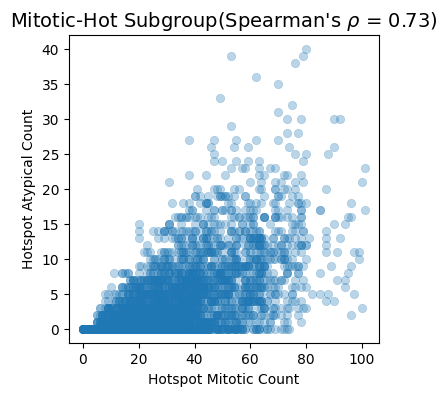

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation between two columns
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypicalNew.csv")
# df = df[df["type"].isin(['BRCA'])]
# df = df[df["mit_hotspot_count"]>50]
df = df[df["temperature"]=="Cold"]
# Calculate the correlation between two columns
feat1 = 'mit_hotspot_count'
feat2 = 'aty_hotspot_count'
correlation_value = df[feat1].corr(df[feat2], method="spearman")

# Create a scatter plot
plt.figure(figsize=(4, 4))
sns.scatterplot(x=feat1, y=feat2, data=df, alpha=0.3, edgecolor=None)
plt.xlabel("Hotspot Mitotic Count")
plt.ylabel("Hotspot Atypical Count")
# Set the title with the correlation value
plt.title(r"Mitotic-Hot Subgroup(Spearman's $\rho$" + f" = {correlation_value:.2f})", fontsize=14)
plt.savefig("results_final/morphology/hsc_hac_cold.png", dpi=600, bbox_inches = 'tight', pad_inches = 0.01)
# Display the plot
plt.show()

In [2]:
import pandas as pd

# Example DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # If you're loading from a CSV
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")

# Group by 'type' and sum the OS, PFI, DSS, and DFI columns
grouped = df.groupby('type').agg({
    'OS': 'sum',
    'PFI': 'sum',
    'DSS': 'sum',
    'DFI': 'sum',
    'type': 'size'  # Count the number of rows for each type
}).rename(columns={'type': 'count'})

# Sort by the count in descending order
sorted_grouped = grouped.sort_values(by='count', ascending=False)

# Print the results
print(sorted_grouped)


             OS    PFI    DSS    DFI  count
type                                       
BRCA      146.0  139.0   79.0   81.0   1054
GBMLGG    442.0  510.0  399.0   22.0    873
COADREAD  122.0  155.0   76.0   30.0    589
KIRC      171.0  155.0  109.0   14.0    512
UCEC       81.0  115.0   54.0   52.0    505
LUSC      205.0  138.0   84.0   59.0    478
LUAD      166.0  191.0  105.0   87.0    467
HNSC      208.0  181.0  121.0   24.0    450
THCA       14.0   47.0    7.0   24.0    437
SKCM      189.0  279.0  164.0    0.0    432
BLCA      174.0  165.0  118.0   31.0    385
STAD      145.0  131.0   95.0   45.0    375
LIHC      128.0  180.0   80.0  144.0    364
PRAD        9.0   58.0    4.0   19.0    342
KIRP       41.0   57.0   27.0   27.0    273
CESC       65.0   63.0   49.0   24.0    269
SARC       87.0  120.0   71.0   59.0    227
PAAD      100.0  109.0   79.0   22.0    183
ESCA       66.0   75.0   46.0   21.0    154
PCPG        4.0   13.0    2.0    3.0    146
TGCT        2.0   33.0    2.0   

In [13]:
sorted_grouped = grouped.sort_values(by=['DFI', 'count', ], ascending=False)

# Print the results
print(sorted_grouped)

             OS    PFI    DSS    DFI  count
type                                       
LIHC      128.0  180.0   80.0  144.0    364
LUAD      166.0  191.0  105.0   87.0    467
BRCA      146.0  139.0   79.0   81.0   1054
LUSC      205.0  138.0   84.0   59.0    478
SARC       87.0  120.0   71.0   59.0    227
UCEC       81.0  115.0   54.0   52.0    505
STAD      145.0  131.0   95.0   45.0    375
BLCA      174.0  165.0  118.0   31.0    385
COADREAD  122.0  155.0   76.0   30.0    589
KIRP       41.0   57.0   27.0   27.0    273
TGCT        2.0   33.0    2.0   27.0    121
OV         72.0   70.0   57.0   26.0    106
HNSC      208.0  181.0  121.0   24.0    450
THCA       14.0   47.0    7.0   24.0    437
CESC       65.0   63.0   49.0   24.0    269
GBMLGG    442.0  510.0  399.0   22.0    873
PAAD      100.0  109.0   79.0   22.0    183
ESCA       66.0   75.0   46.0   21.0    154
PRAD        9.0   58.0    4.0   19.0    342
KIRC      171.0  155.0  109.0   14.0    512
CHOL       17.0   21.0   16.0   

In [15]:
sorted_grouped.head(21).index

Index(['LIHC', 'LUAD', 'BRCA', 'LUSC', 'SARC', 'UCEC', 'STAD', 'BLCA',
       'COADREAD', 'KIRP', 'TGCT', 'OV', 'HNSC', 'THCA', 'CESC', 'GBMLGG',
       'PAAD', 'ESCA', 'PRAD', 'KIRC', 'CHOL'],
      dtype='object', name='type')

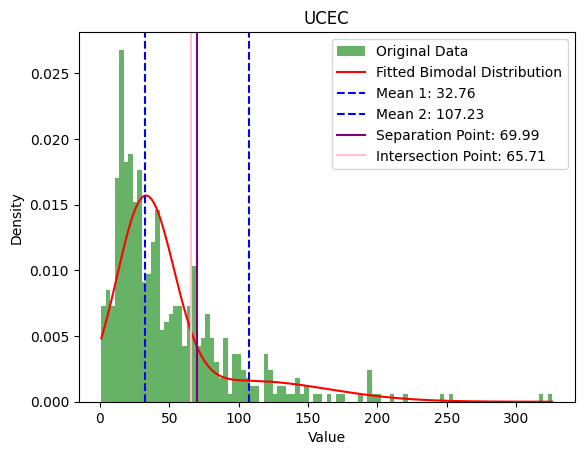

Mean 1: 32.76
Mean 2: 107.23
Separation Point: 69.99
Intersection Point: 65.71
Meadian Point: 36.00


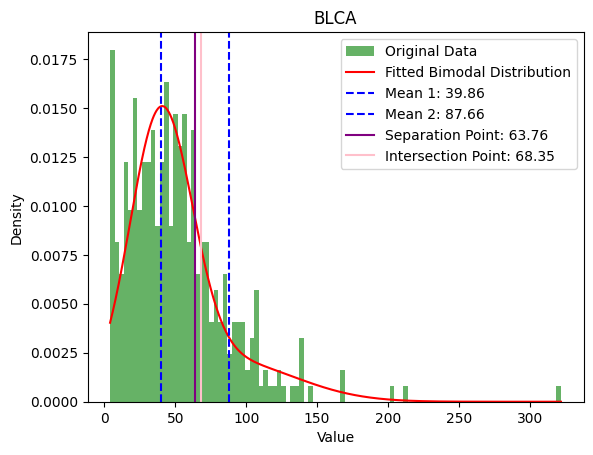

Mean 1: 39.86
Mean 2: 87.66
Separation Point: 63.76
Intersection Point: 68.35
Meadian Point: 46.00


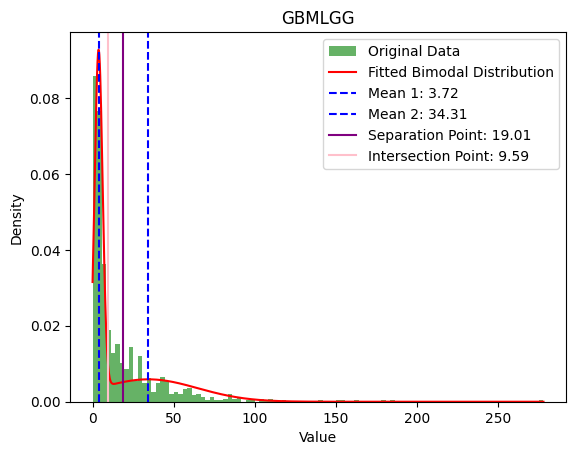

Mean 1: 3.72
Mean 2: 34.31
Separation Point: 19.01
Intersection Point: 9.59
Meadian Point: 7.00


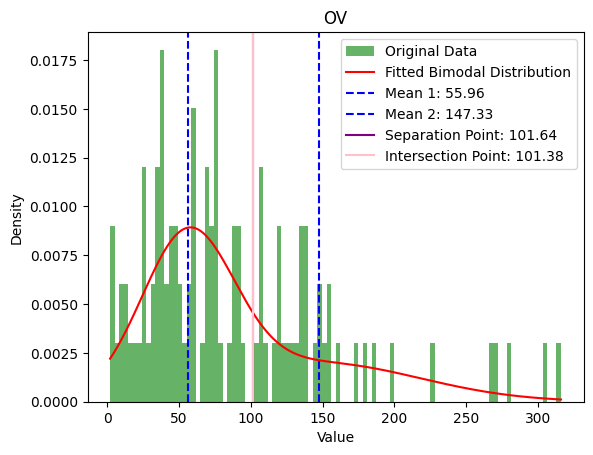

Mean 1: 55.96
Mean 2: 147.33
Separation Point: 101.64
Intersection Point: 101.38
Meadian Point: 73.50


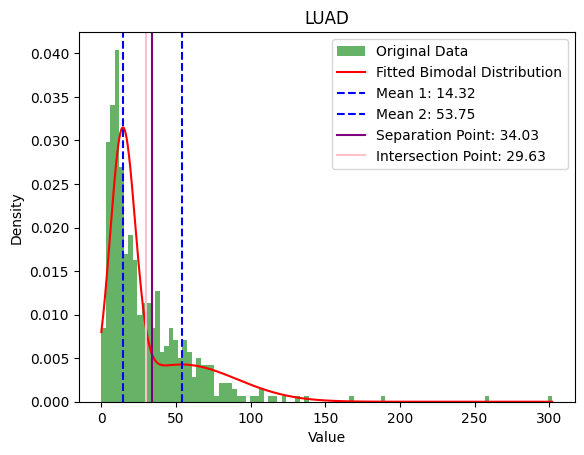

Mean 1: 14.32
Mean 2: 53.75
Separation Point: 34.03
Intersection Point: 29.63
Meadian Point: 20.00


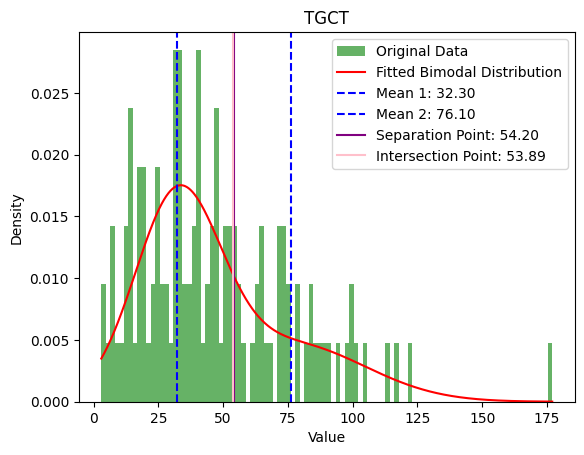

Mean 1: 32.30
Mean 2: 76.10
Separation Point: 54.20
Intersection Point: 53.89
Meadian Point: 41.00


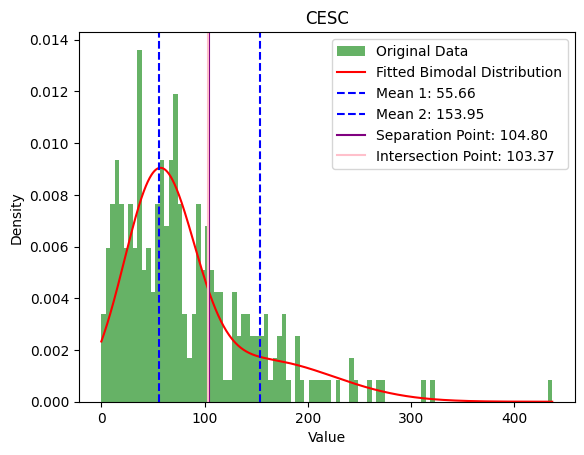

Mean 1: 55.66
Mean 2: 153.95
Separation Point: 104.80
Intersection Point: 103.37
Meadian Point: 69.00


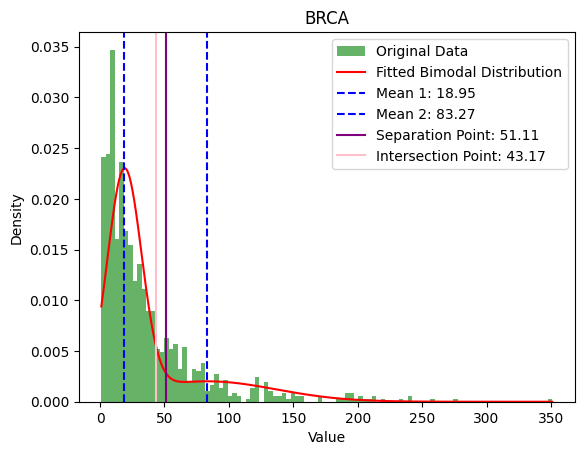

Mean 1: 18.95
Mean 2: 83.27
Separation Point: 51.11
Intersection Point: 43.17
Meadian Point: 22.00


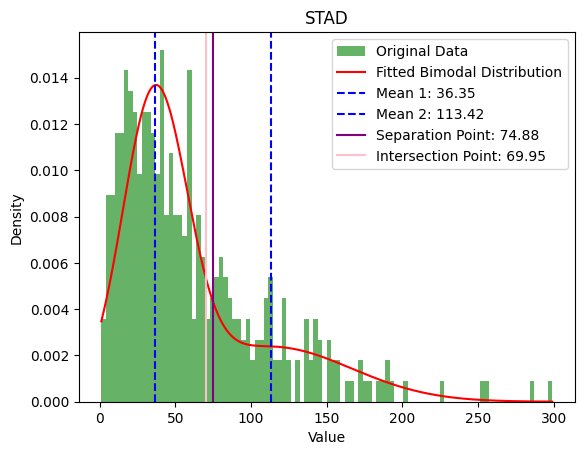

Mean 1: 36.35
Mean 2: 113.42
Separation Point: 74.88
Intersection Point: 69.95
Meadian Point: 47.00


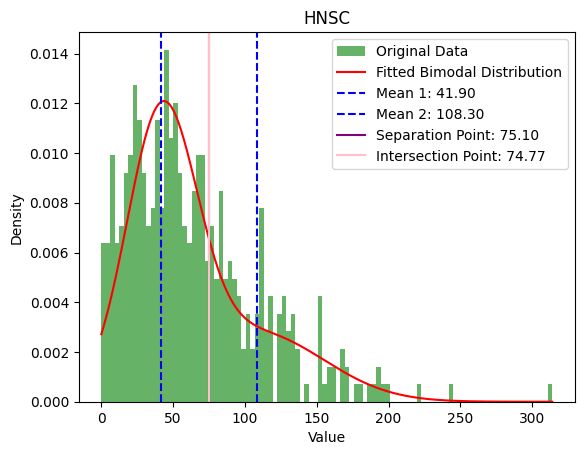

Mean 1: 41.90
Mean 2: 108.30
Separation Point: 75.10
Intersection Point: 74.77
Meadian Point: 53.50


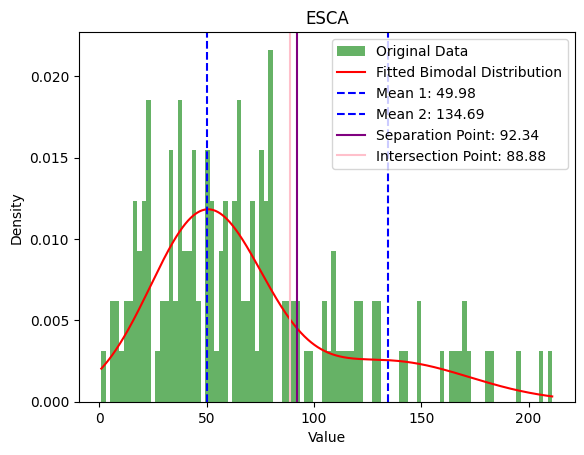

Mean 1: 49.98
Mean 2: 134.69
Separation Point: 92.34
Intersection Point: 88.88
Meadian Point: 63.00


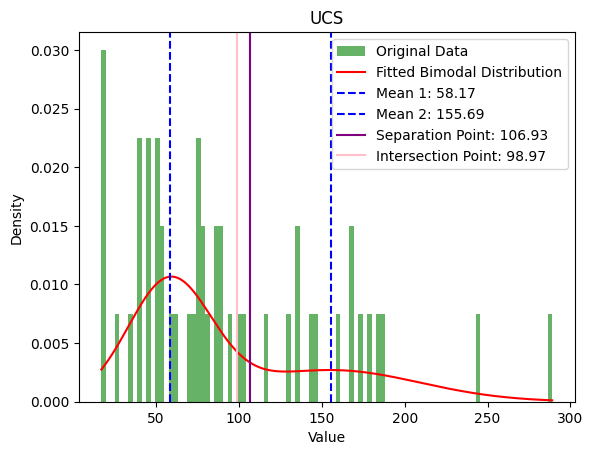

Mean 1: 58.17
Mean 2: 155.69
Separation Point: 106.93
Intersection Point: 98.97
Meadian Point: 77.00


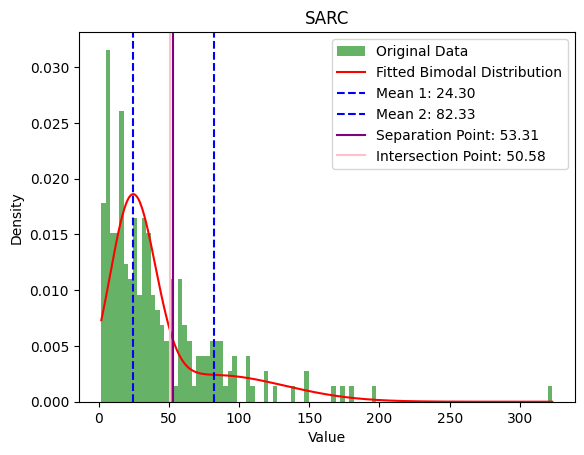

Mean 1: 24.30
Mean 2: 82.33
Separation Point: 53.31
Intersection Point: 50.58
Meadian Point: 31.00


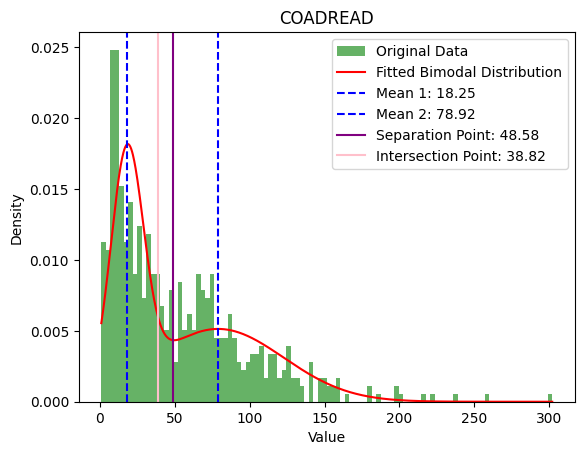

Mean 1: 18.25
Mean 2: 78.92
Separation Point: 48.58
Intersection Point: 38.82
Meadian Point: 39.00


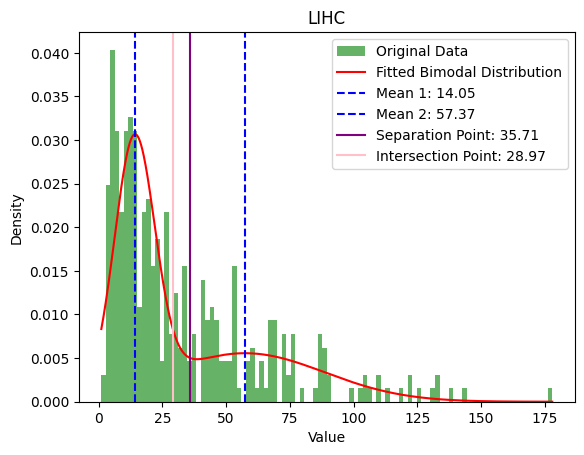

Mean 1: 14.05
Mean 2: 57.37
Separation Point: 35.71
Intersection Point: 28.97
Meadian Point: 22.00


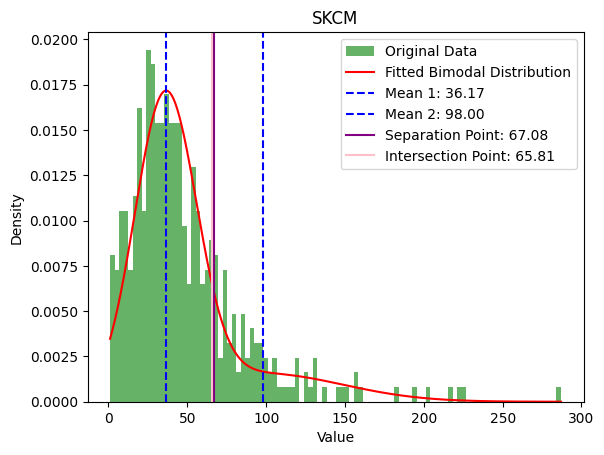

Mean 1: 36.17
Mean 2: 98.00
Separation Point: 67.08
Intersection Point: 65.81
Meadian Point: 40.00


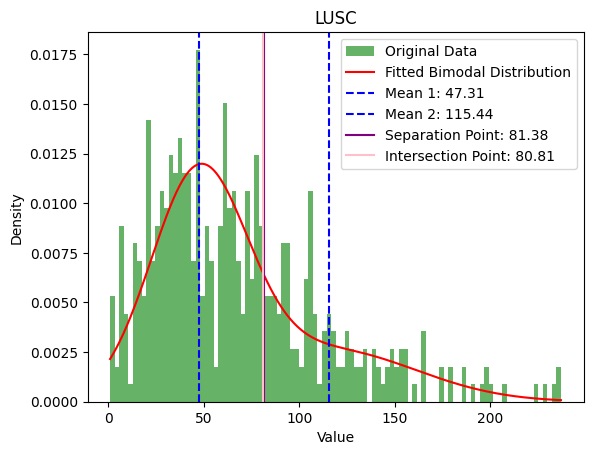

Mean 1: 47.31
Mean 2: 115.44
Separation Point: 81.38
Intersection Point: 80.81
Meadian Point: 60.00


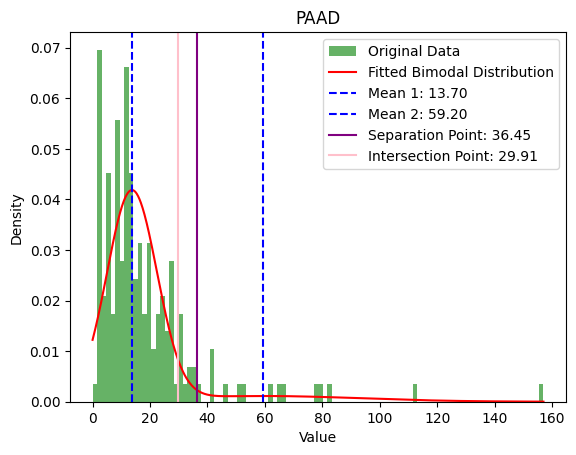

Mean 1: 13.70
Mean 2: 59.20
Separation Point: 36.45
Intersection Point: 29.91
Meadian Point: 13.00


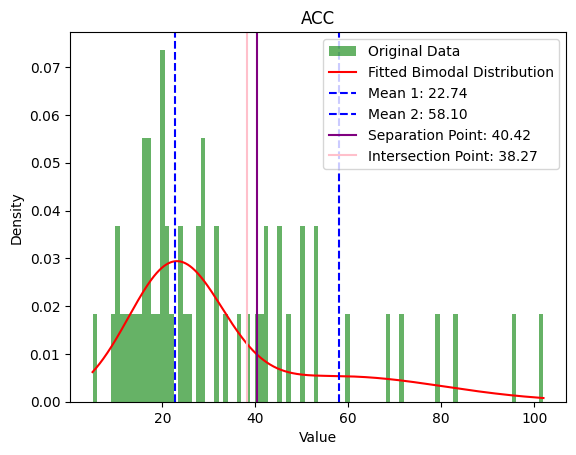

Mean 1: 22.74
Mean 2: 58.10
Separation Point: 40.42
Intersection Point: 38.27
Meadian Point: 27.00


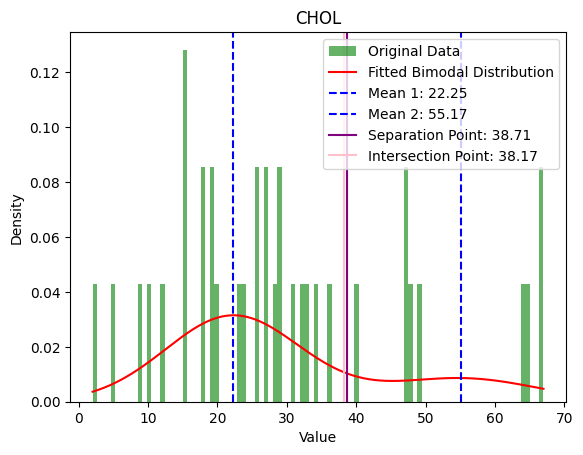

Mean 1: 22.25
Mean 2: 55.17
Separation Point: 38.71
Intersection Point: 38.17
Meadian Point: 27.00


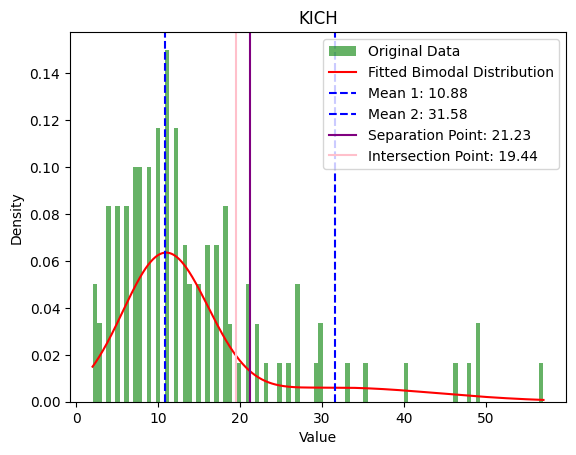

Mean 1: 10.88
Mean 2: 31.58
Separation Point: 21.23
Intersection Point: 19.44
Meadian Point: 12.00


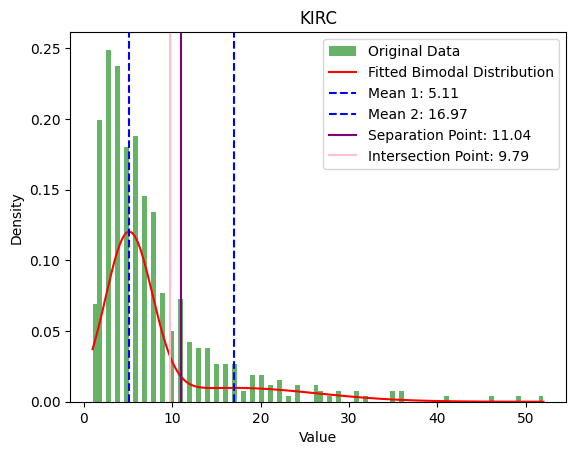

Mean 1: 5.11
Mean 2: 16.97
Separation Point: 11.04
Intersection Point: 9.79
Meadian Point: 6.00


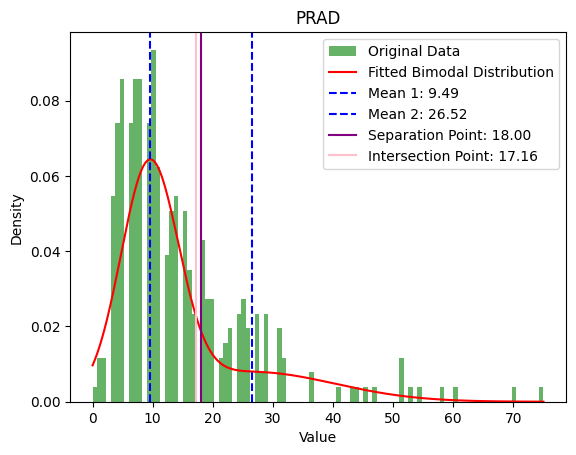

Mean 1: 9.49
Mean 2: 26.52
Separation Point: 18.00
Intersection Point: 17.16
Meadian Point: 11.00


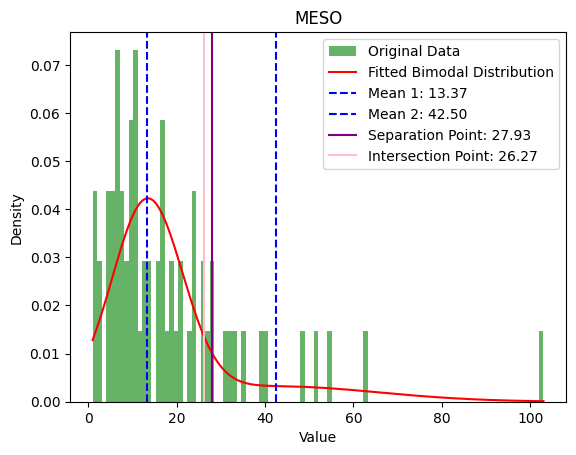

Mean 1: 13.37
Mean 2: 42.50
Separation Point: 27.93
Intersection Point: 26.27
Meadian Point: 14.00


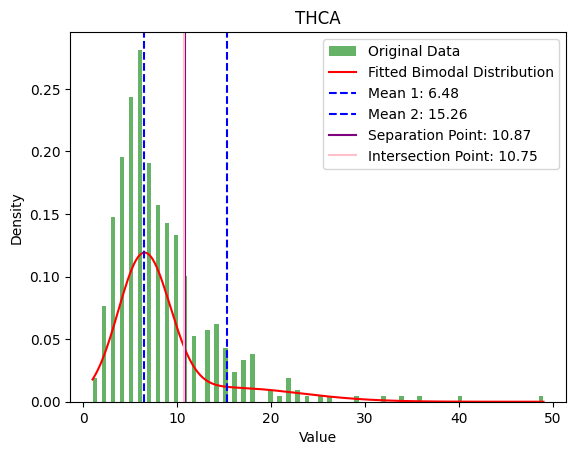

Mean 1: 6.48
Mean 2: 15.26
Separation Point: 10.87
Intersection Point: 10.75
Meadian Point: 7.00


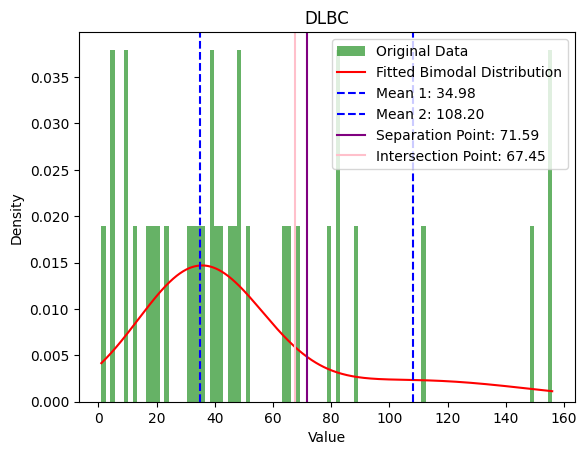

Mean 1: 34.98
Mean 2: 108.20
Separation Point: 71.59
Intersection Point: 67.45
Meadian Point: 41.50


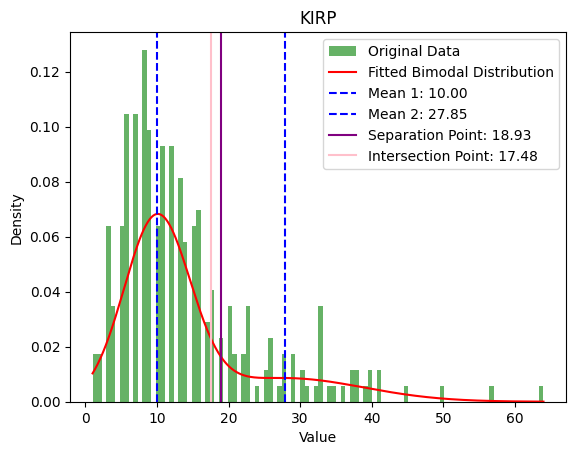

Mean 1: 10.00
Mean 2: 27.85
Separation Point: 18.93
Intersection Point: 17.48
Meadian Point: 12.00


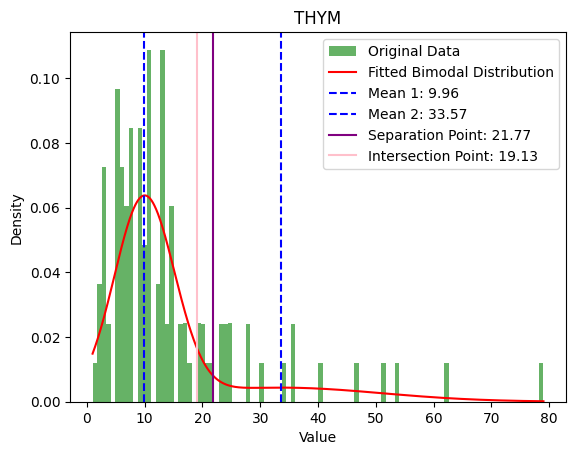

Mean 1: 9.96
Mean 2: 33.57
Separation Point: 21.77
Intersection Point: 19.13
Meadian Point: 11.00


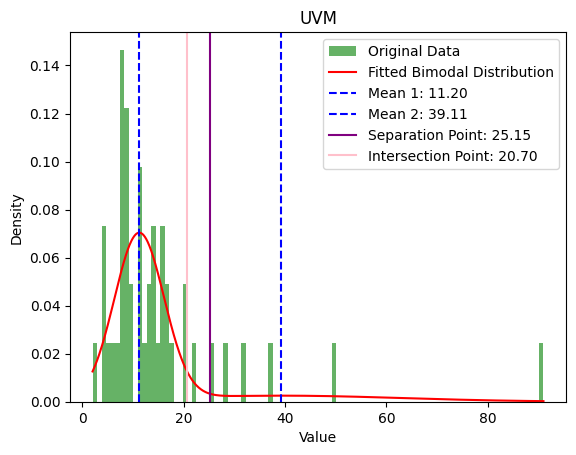

Mean 1: 11.20
Mean 2: 39.11
Separation Point: 25.15
Intersection Point: 20.70
Meadian Point: 11.00


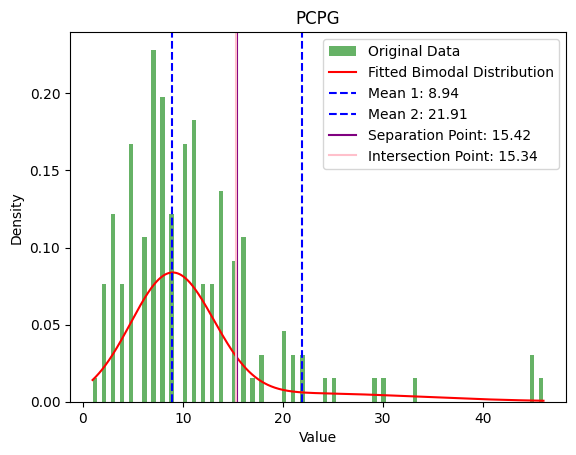

Mean 1: 8.94
Mean 2: 21.91
Separation Point: 15.42
Intersection Point: 15.34
Meadian Point: 9.50


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

cancer_list = list(df["type"].unique())

def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    if round_it:
        separation_point = np.round(separation_point)

    return separation_point
    
for cancer_type in cancer_list:
    # Select the specific column
    data = df[df["type"]==cancer_type]
    data = data['mit_hotspot_count'].values.reshape(-1, 1) # mit_hotspot_count
    # Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    # Get the means and variances of the two Gaussian components
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]

    # Generate values for plotting the fitted bimodal distribution
    x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)

    # Plot original data distribution as a histogram
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

    # Plot the fitted bimodal distribution
    plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

    # Plot the means of the two distributions as vertical lines
    plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
    plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

    # Plot the separation point as a vertical line
    plt.axvline(separation_point, color='purple', linestyle='-', label=f'Separation Point: {separation_point:.2f}')
    plt.axvline(intersection_point, color='pink', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(cancer_type)
    plt.legend()

    # Show the plot
    plt.show()

    # Print the means and separation point
    print(f"Mean 1: {mean1:.2f}")
    print(f"Mean 2: {mean2:.2f}")
    print(f"Separation Point: {separation_point:.2f}")
    print(f"Intersection Point: {intersection_point:.2f}")
    print(f"Meadian Point: {np.median(data):.2f}")

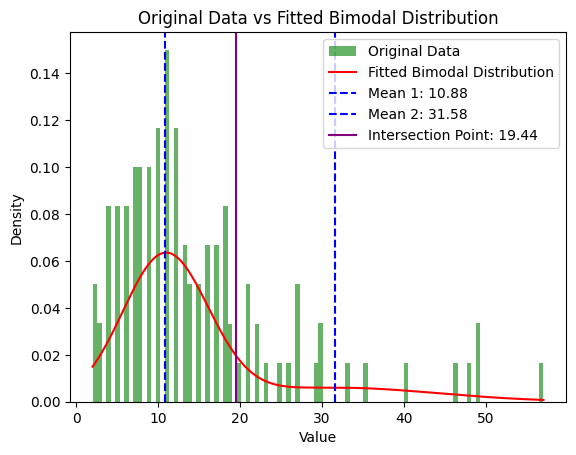

Mean 1: 10.88
Mean 2: 31.58
Intersection Point: 19.44


In [19]:
# Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
gmm = GaussianMixture(n_components=2)
gmm.fit(data)

# Get the means and variances of the two Gaussian components
means = gmm.means_.flatten()
variances = gmm.covariances_.flatten()
mean1, mean2 = np.sort(means)
var1, var2 = variances[np.argsort(means)]

# Solve for the intersection of the two Gaussian distributions
a = 1/(2*var1) - 1/(2*var2)
b = mean2/var2 - mean1/var1
c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

# The quadratic formula to find the intersection points
roots = np.roots([a, b, c])
intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]  # Take the root between the means

# Generate values for plotting the fitted bimodal distribution
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
logprob = gmm.score_samples(x)
pdf = np.exp(logprob)

# Plot original data distribution as a histogram
plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

# Plot the fitted bimodal distribution
plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

# Plot the means of the two distributions as vertical lines
plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

# Plot the intersection point as a vertical line
plt.axvline(intersection_point, color='purple', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

# Add labels and legend
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Original Data vs Fitted Bimodal Distribution')
plt.legend()

# Show the plot
plt.show()

# Print the means and intersection point
print(f"Mean 1: {mean1:.2f}")
print(f"Mean 2: {mean2:.2f}")
print(f"Intersection Point: {intersection_point:.2f}")

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Load your dataset
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer_withAtypical.csv")

# Get the list of unique cancer types
cancer_list = list(df["type"].unique())

# Function to find the best separation point using Gaussian Mixture Model
def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0] 

    if round_it:
        intersection_point = np.round(intersection_point)

    return intersection_point

# Initialize a new column 'temperature' to store the classification
df['temperature'] = np.nan

# Loop through each cancer type
for cancer_type in cancer_list:
    # Filter data for the specific cancer type
    data = df[df["type"] == cancer_type]
    
    # Get the 'mit_hotspot_count' values and reshape them for GMM
    mit_hotspot_data = data['mit_hotspot_count'].values.reshape(-1, 1)
    
    # Calculate the separation point using GMM
    separation_point = find_cut_off(mit_hotspot_data, round_it=True)
    print(cancer_type, separation_point)
    
    # Update the temperature column based on the separation point
    df.loc[df['type'] == cancer_type, 'temperature'] = np.where(
        df.loc[df['type'] == cancer_type, 'mit_hotspot_count'] >= separation_point, 'Hot', 'Cold'
    )

# Save the updated DataFrame if needed
df.to_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypical.csv", index=False)



UCEC 66.0
BLCA 66.0
GBMLGG 10.0
OV 95.0
LUAD 30.0
TGCT 54.0
CESC 103.0
BRCA 44.0
STAD 70.0
HNSC 76.0
ESCA 89.0
UCS 99.0
SARC 51.0
COADREAD 39.0
LIHC 29.0
SKCM 66.0
LUSC 81.0
PAAD 30.0
ACC 41.0
CHOL 38.0
KICH 19.0
KIRC 10.0
PRAD 17.0
MESO 28.0
THCA 11.0
DLBC 67.0
KIRP 17.0
THYM 19.0
UVM 91.0
PCPG 15.0


In [12]:
# updating the atypical counts and ratios
df[["mit_hotspot_count","aty_hotspot_count", "aty_hotspot_ratio","mit_wsi_count","aty_wsi_count","aty_wsi_ratio"]].sort_values(by="aty_wsi_count")

,mit_hotspot_count,aty_hotspot_count,aty_hotspot_ratio,mit_wsi_count,aty_wsi_count,aty_wsi_ratio
9244,0,0,0.000000,0,0,0.000000
7758,1,0,0.000000,1,0,0.000000
7757,1,0,0.000000,1,0,0.000000
7756,1,0,0.000000,1,0,0.000000
7755,3,0,0.000000,5,0,0.000000
...,...,...,...,...,...,...
13,187,88,0.470588,9383,3845,0.409784
65,197,55,0.279188,13925,3995,0.286894
5,177,104,0.587571,8363,4073,0.487026
3,279,117,0.419355,10478,4244,0.405039


In [16]:
# updating the atypical counts and ratios
df['aty_hotspot_count'] = (df['aty_hotspot_count'] - 3).clip(lower=0)
df['aty_wsi_count'] = (df['aty_wsi_count'] - 10).clip(lower=0)
df['aty_wsi_ratio'] = df['aty_wsi_count']/df['mit_wsi_count']
df['aty_hotspot_ratio'] = df['aty_hotspot_count']/df['mit_hotspot_count']
df[["mit_hotspot_count","aty_hotspot_count", "aty_hotspot_ratio","mit_wsi_count","aty_wsi_count","aty_wsi_ratio"]].sort_values(by="aty_wsi_count")

,mit_hotspot_count,aty_hotspot_count,aty_hotspot_ratio,mit_wsi_count,aty_wsi_count,aty_wsi_ratio
9244,0,0,NaN,0,0,NaN
7637,1,0,0.000000,6,0,0.000000
6189,5,0,0.000000,34,0,0.000000
6188,5,0,0.000000,8,0,0.000000
7636,2,0,0.000000,19,0,0.000000
...,...,...,...,...,...,...
13,187,85,0.454545,9383,3835,0.408718
65,197,52,0.263959,13925,3985,0.286176
5,177,101,0.570621,8363,4063,0.485830
3,279,114,0.408602,10478,4234,0.404085


In [17]:
df.to_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypicalNew.csv", index=False)

In [15]:
df = pd.read_csv("/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancerNew_withAtypical.csv")

all


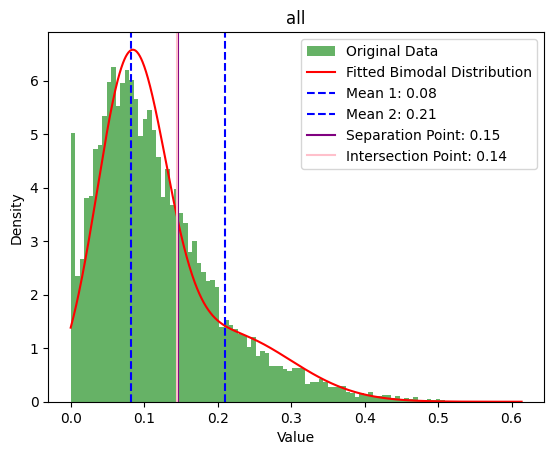

Mean 1: 0.08
Mean 2: 0.21
Separation Point: 0.15
Intersection Point: 0.14
Meadian Point: 0.10


In [22]:
# clustering immune
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

immune_df = pd.read_csv("gene/data/tcga_all_immune.csv")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["COAD", "READ"], "COADREAD")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["GBM", "LGG"], "GBMLGG")


mitosis_feats = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer.csv')
mitosis_feats["type"] = mitosis_feats["type"].replace(["COAD", "READ"], "COADREAD")
mitosis_feats["type"] = mitosis_feats["type"].replace(["GBM", "LGG"], "GBMLGG")

cancer_list = list(mitosis_feats["type"].unique())

def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    if round_it:
        separation_point = np.round(separation_point)

    return separation_point
    
for cancer_type in ["all"]:
    print(cancer_type)
    # if cancer_type == "All":
    #     mitosis_feats_cancer = mitosis_feats[mitosis_feats["type"].isin(ALL_CANCERS)]
    #     gene_exp_cancer = immune_df[immune_df["TCGA Study"].isin(ALL_CANCERS)]
    # else:
    #     mitosis_feats_cancer = mitosis_feats[mitosis_feats["type"]==cancer_type]
    #     gene_exp_cancer = immune_df[immune_df["TCGA Study"]==cancer_type]


    # # drop missing mutations
    # gene_exp_cancer = gene_exp_cancer.dropna(axis=1, how="all")
    # # drop cases with all mutations as Nan


    # # Find the common case names between mitosis features and gene expressions
    # common_cases = pd.Series(list(set(mitosis_feats_cancer['bcr_patient_barcode']).intersection(set(gene_exp_cancer['TCGA Participant Barcode']))))
    # ## Keep only the rows with the common case names in both dataframes
    # df1_common = mitosis_feats_cancer[mitosis_feats_cancer['bcr_patient_barcode'].isin(common_cases)]
    # df2_common = gene_exp_cancer[gene_exp_cancer['TCGA Participant Barcode'].isin(common_cases)]
    # df2_common = df2_common.drop_duplicates(subset='TCGA Participant Barcode')

    # ## Sort the dataframes based on 'case_name'
    # df1_common = df1_common.sort_values('bcr_patient_barcode')
    # df2_common = df2_common.sort_values('TCGA Participant Barcode')

    # df1_common = df1_common.reset_index(drop=True)
    # df2_common = df2_common.reset_index(drop=True)

    # data = pd.concat([df1_common["temperature"], df2_common[["T Cells CD8"]]], axis=1)

    if cancer_type != "all":
        data = immune_df[immune_df["TCGA Study"]==cancer_type]
    else:
        data = immune_df[immune_df["TCGA Study"].isin(cancer_list)]
    data = data[["T Cells CD8"]].dropna()
    # data = data.dropna()
    data = data["T Cells CD8"].values.reshape(-1, 1) # mit_hotspot_count
    # Fit a Gaussian Mixture Model (GMM) to the data with 2 components (for bimodal)
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    # Get the means and variances of the two Gaussian components
    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0]

    # Generate values for plotting the fitted bimodal distribution
    x = np.linspace(min(data), max(data), 1000).reshape(-1, 1)
    logprob = gmm.score_samples(x)
    pdf = np.exp(logprob)

    # Plot original data distribution as a histogram
    plt.hist(data, bins=100, density=True, alpha=0.6, color='g', label='Original Data')

    # Plot the fitted bimodal distribution
    plt.plot(x, pdf, 'r-', label='Fitted Bimodal Distribution')

    # Plot the means of the two distributions as vertical lines
    plt.axvline(mean1, color='blue', linestyle='--', label=f'Mean 1: {mean1:.2f}')
    plt.axvline(mean2, color='blue', linestyle='--', label=f'Mean 2: {mean2:.2f}')

    # Plot the separation point as a vertical line
    plt.axvline(separation_point, color='purple', linestyle='-', label=f'Separation Point: {separation_point:.2f}')
    plt.axvline(intersection_point, color='pink', linestyle='-', label=f'Intersection Point: {intersection_point:.2f}')

    # Add labels and legend
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(cancer_type)
    plt.legend()

    # Show the plot
    plt.show()

    # Print the means and separation point
    print(f"Mean 1: {mean1:.2f}")
    print(f"Mean 2: {mean2:.2f}")
    print(f"Separation Point: {separation_point:.2f}")
    print(f"Intersection Point: {intersection_point:.2f}")
    print(f"Meadian Point: {np.median(data):.2f}")

In [12]:
# Finding immune hot/cold based on T Cells CD8
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

immune_df = pd.read_csv("gene/data/tcga_all_immune.csv")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["COAD", "READ"], "COADREAD")
immune_df["TCGA Study"] = immune_df["TCGA Study"].replace(["GBM", "LGG"], "GBMLGG")


mitosis_feats = pd.read_csv('/mnt/gpfs01/lsf-workspace/u2070124/Data/Data/pancancer/tcga_features_final_ClusterByCancer.csv')
mitosis_feats["type"] = mitosis_feats["type"].replace(["COAD", "READ"], "COADREAD")
mitosis_feats["type"] = mitosis_feats["type"].replace(["GBM", "LGG"], "GBMLGG")

cancer_list = list(mitosis_feats["type"].unique())

# Load your dataset
df = immune_df.copy()

# Function to find the best separation point using Gaussian Mixture Model
def find_cut_off(data, round_it=True):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(data)

    # Get the means of the two Gaussian components
    means = gmm.means_.flatten()
    mean1, mean2 = np.sort(means)  # Sort means to ensure correct order

    # Calculate the midpoint (best separation point)
    separation_point = (mean1 + mean2) / 2

    means = gmm.means_.flatten()
    variances = gmm.covariances_.flatten()
    mean1, mean2 = np.sort(means)
    var1, var2 = variances[np.argsort(means)]

    # Solve for the intersection of the two Gaussian distributions
    a = 1/(2*var1) - 1/(2*var2)
    b = mean2/var2 - mean1/var1
    c = mean1**2 / (2*var1) - mean2**2 / (2*var2) - np.log(np.sqrt(var2/var1))

    # The quadratic formula to find the intersection points
    roots = np.roots([a, b, c])
    intersection_point = roots[np.logical_and(roots > mean1, roots < mean2)][0] 

    if round_it:
        intersection_point = np.round(intersection_point)

    return intersection_point

# Initialize a new column 'temperature' to store the classification
df['T_Cells_CD8_temperature'] = np.nan

# Loop through each cancer type
for cancer_type in cancer_list:
    # Filter data for the specific cancer type
    data = df[df["TCGA Study"] == cancer_type]
    data = data[["T Cells CD8"]].dropna()
    # Get the 'mit_hotspot_count' values and reshape them for GMM
    mit_hotspot_data = data["T Cells CD8"].values.reshape(-1, 1)
    
    # Calculate the separation point using GMM
    separation_point = find_cut_off(mit_hotspot_data, round_it=False)
    print(cancer_type, separation_point)
    
    # Update the temperature column based on the separation point
    df.loc[data.index, "T_Cells_CD8_temperature"] = np.where(
        df.loc[data.index, "T Cells CD8"] >= separation_point, 'Hot', 'Cold'
    )

# Save the updated DataFrame if needed
df.to_csv("gene/data/tcga_all_immune_new.csv", index=False)



SARC 0.11148074954127965
LIHC 0.16277414201214355
THYM 0.2594879914694906
ACC 0.11880402598423367
BRCA 0.1129604488971403
KICH 0.08493408270865781
STAD 0.1383705385720045
BLCA 0.1425053973346678
THCA 0.13608685903717088
GBMLGG 0.06573974886495294
UCEC 0.16487316691555404
LUAD 0.11265948422512115
KIRC 0.2195069879490768
KIRP 0.1373140494218842
PAAD 0.1062903839348139
CESC 0.17527584301981602
PCPG 0.1195710764496592
MESO 0.1413320365300266
SKCM 0.1859854223811119
PRAD 0.1494480046846273
COADREAD 0.13990715153510802
ESCA 0.11030772948293331
LUSC 0.13207469105154074
HNSC 0.11911808088037706
OV 0.0987572975115668
TGCT 0.13049294040550644
CHOL 0.15125412285965306
UVM 0.1199036437210989
DLBC 0.1188727868302405
UCS 0.1318085935409553


In [21]:
df[df["TCGA Study"]=="UCS"][["T Cells CD8", "T_Cells_CD8_temperature"]].sort_values(by="T_Cells_CD8_temperature").dropna()

,T Cells CD8,T_Cells_CD8_temperature
946,0.101630,Cold
5418,0.054440,Cold
10912,0.096278,Cold
6549,0.021018,Cold
6552,0.044015,Cold
7623,0.110896,Cold
7624,0.076057,Cold
7625,0.105838,Cold
7626,0.006912,Cold
7627,0.047548,Cold


In [18]:
df["mit_hotspot_count"]

0       247
1       322
2       155
3       279
4       257
       ... 
9240      0
9241      0
9242      0
9243      0
9244      0
Name: mit_hotspot_count, Length: 9245, dtype: int64